In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
ipage_data = pd.read_csv('./data/ipage_final.csv')
print(ipage_data.head())
print(ipage_data.shape)

        Area Soil group   Land class   Soil type   pH   SOC  Nitrogen  \
0  Mithpukur      belab  high ground  Clay loam   5.0  1.27      0.08   
1  Mithpukur      belab  high ground  Clay loam   4.9  1.47      0.09   
2  Mithpukur      belab  high ground  Clay loam   4.6  1.07      0.05   
3  Mithpukur      belab  high ground  Clay loam   5.2  1.51      0.06   
4  Mithpukur      belab  high ground  Clay loam   5.3  1.08      0.11   

   Potassium  Phosphorus  Sulfur  Boron  Zinc  Sand  Silt  Clay  
0       0.15        19.6    37.7   0.26  0.86  33.0  33.0  33.0  
1       0.25         4.1    32.0   0.25  0.75  33.0  33.0  33.0  
2       0.09        13.3    13.5   0.27  0.95  33.0  33.0  33.0  
3       0.30        20.2    30.0   0.28  1.00  33.0  33.0  33.0  
4       0.17        20.5    27.8   0.30  1.04  33.0  33.0  33.0  
(581, 15)


In [95]:
isda_data = pd.read_csv('./data/isda_final.csv')
print(isda_data.head())
print(isda_data.shape)

   longitude  latitude   Boron      SOC  Nitrogen       pH  Phosphorus  \
0    9.70933  10.16906  0.1590   7.6977  0.705400  6.31211    14.11320   
1   11.69308   9.08007  0.1016  13.1397  1.087610  5.36189    12.67940   
2    9.04743   9.66625  0.1165  12.4706  0.716328  6.32176     4.97233   
3    8.86292   9.25251  0.1215  14.5912  1.525340  5.56870     3.45258   
4    7.73493   9.52822  0.1676  10.0637  0.801812  5.60867     5.89749   

   Potassium    Sulfur      Zinc  Sand  Silt  Clay  Area Soil group  \
0    119.188   8.05925  1.496920  51.0  21.0  22.0  isda       isda   
1    174.787  16.31860  1.901780  59.0  19.0  20.0  isda       isda   
2    201.410  10.05520  1.862410  56.0  18.0  22.0  isda       isda   
3    151.807  12.80030  0.656912  50.0  19.0  29.0  isda       isda   
4     80.056   5.21915  0.998162  57.0  19.0  21.0  isda       isda   

  Land class Soil type  
0       isda      isda  
1       isda      isda  
2       isda      isda  
3       isda      isda  
4  

In [96]:
ipage_data['source'] = 'ipage'
isda_data['source'] = 'isda'

In [97]:
ipage_data.head()

,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay,source
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0,ipage
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0,ipage
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0,ipage
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0,ipage
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0,ipage


In [98]:
ipage_data.columns

Index(['Area', 'Soil group', 'Land class', 'Soil type', 'pH', 'SOC',
       'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Boron', 'Zinc',
       'Sand', 'Silt', 'Clay', 'source'],
      dtype='object')

In [99]:
print(ipage_data.shape)
# Remove outliers from ipage data
ipage_data = ipage_data[(ipage_data['Nitrogen']<2)&(ipage_data['Potassium']<10)&(ipage_data['SOC']<5)&(ipage_data['Boron']<5)]
print(ipage_data.shape)

(581, 16)
(573, 16)


In [100]:
req_cols = ['pH', 'SOC','Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Boron', 'Zinc',
       'Sand', 'Silt', 'Clay', 'source']
df_combined = pd.concat([ipage_data[req_cols],isda_data[req_cols]],ignore_index=True)
df_combined.shape

(2682, 12)

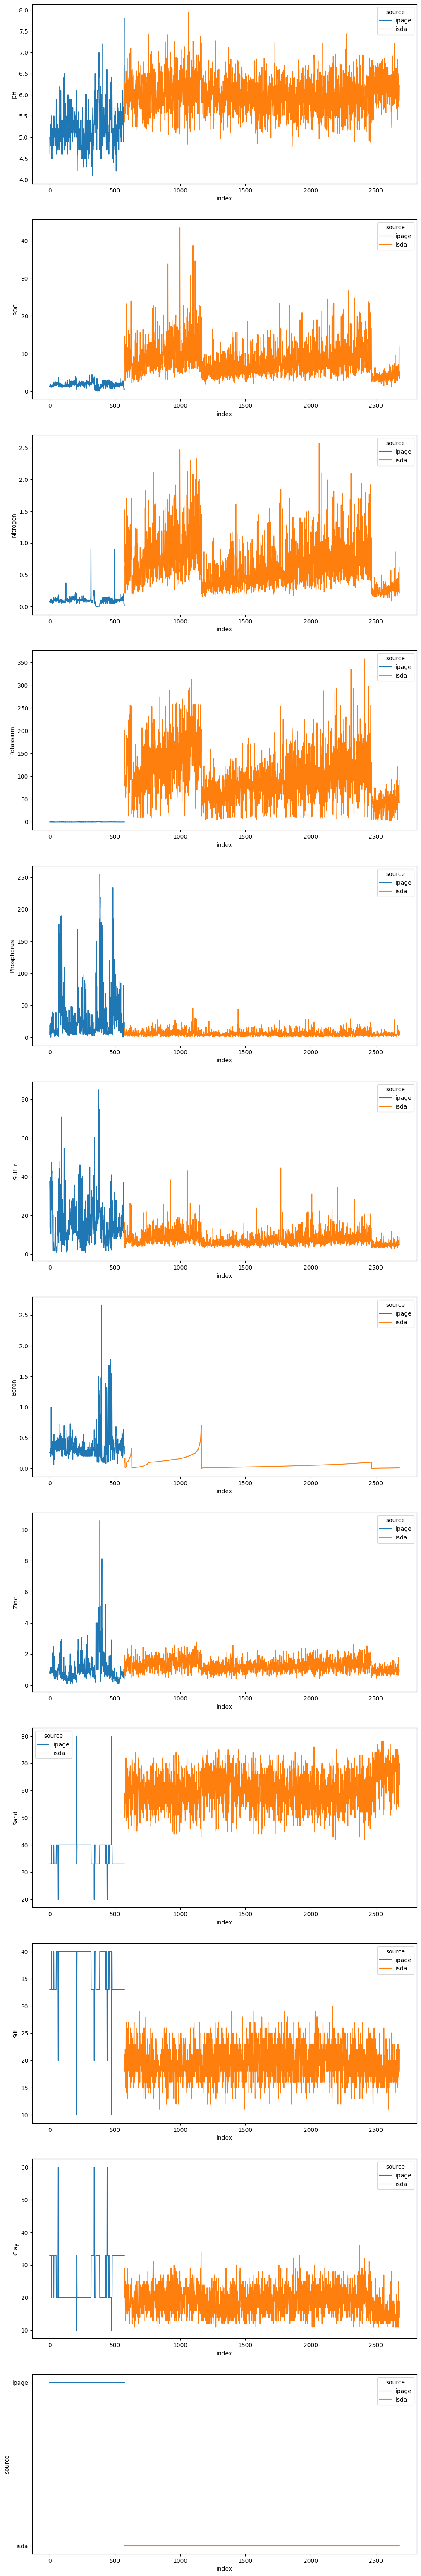

In [101]:
fig, axes = plt.subplots(len(df_combined.columns), 1, figsize=(12,8*10))
for i,col in enumerate(df_combined.columns):
    sns.lineplot(data=df_combined.reset_index(),x='index',y=col,hue='source',ax=axes[i])

#### The units used in ipage data
1. pH
2. SOC (%)
3. Nitrogen N (%)
4. Potassium K (meq/100)
5. Phosphorus P (ug/g)
6. Sulfur S (ug/g)
7. Boron B (ug/g)
8. Zinc Zn (ug/g)


#### The units used in isda data
1. pH
2. SOC (g/kg)
3. Nitrogen N (g/kg)
4. Potassium K (mg/kg)
5. Phosphorus P (mg/kg)
6. Sulfur S (mg/kg)
7. Boron B (mg/kg)
8. Zinc Zn (mg/kg)


#### mg/kg is same as ug/g. The units of Phosphorus, Sulfur, Boron and Zinc are the same. Not sure about SOC, Nitrogen and Pottassium

##### Pottassium unit conversion from meq/100 to mg/kg

meq/100g = (ppmi x Zi) / (10 x Mwi)

ppmi is the concentration of the cation in ppm,

Zi is the charge of the cation and 
Mwi is the molecular weight of the cation in mg/mmol.(pottassium - 39)
so for pottassium,
1 meq/100 = (ppmi X 1) /(10*39)
ppmi (mg/Kg) = 10*39*(meq/100) = 390 * (meq/100)

source : https://cropaia.com/blog/soil-test-units/

In [102]:

mask = df_combined['source']=='ipage'
df_combined.loc[mask,'Potassium'] = df_combined[mask]['Potassium'].apply(lambda x: x*390)
#df_combined.loc[mask,'source'] = (df_combined[mask,'source'])*390

<Axes: xlabel='index', ylabel='Potassium'>

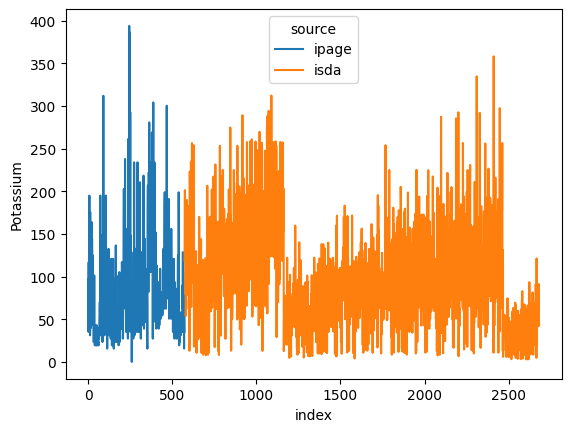

In [103]:

sns.lineplot(data=df_combined.reset_index(),x='index',y='Potassium',hue='source')